<a href="https://colab.research.google.com/github/myaseir/pytorch-notes/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import torch

In [88]:
tensor_2d = torch.randn(3,4)
tensor_2d


tensor([[ 0.9845, -0.6584, -1.5686, -2.0602],
        [-1.9305,  0.0600,  0.1856, -0.7798],
        [-1.4723, -1.8088, -0.1287,  0.9819]])

In [89]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [90]:
# create a model class that inherit nn.module
class Model(nn.Module):
  # Input layer ( features of the flower)
  # hidden layer1 (number of neurons)
  # h2 (n)
  # output ( 3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__() #instantiate our nn.module
    self.fc1=nn.Linear(in_features, h1)
    self.fc2=nn.Linear(h1, h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x

In [91]:
# pick a manual see for randomization
torch.manual_seed(41)
# create an instance of model
model=Model()


In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [94]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [95]:
# changed colomun from string to integer

my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)
my_df

/tmp/ipython-input-3847575499.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [96]:
# Train Test Split Set X,Y
X = my_df.drop('variety', axis=1)
y=my_df['variety']


In [97]:
# convert this into numpy arrays
X=X.values
y=y.values


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41 )


In [100]:
# Convert X features to float tensor
X_train= torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)


In [101]:
# Convert y labels into Tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [102]:
# Set the criteria of the model to measure  the error , how far off the prediction are from
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesnt o down after a bunch of iteration (epochs), lower out learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)



In [103]:
# Train our model
# Epochs( one run thru all the trainnign data in our network)
epochs =100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred= model.forward(X_train) #Get predicteed result

  # Measure the loss/error, gonna be high at first
  loss=criterion(y_pred, y_train) #predicted values vs the y_train

  # keep track of our model losses
  losses.append(loss.detach().numpy())
  # Do some back propogation: take error rate of forward propogation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # print every 10 epoch

  if i%10==0:
    print(f'Epoch:{i} and loss:{loss}')





Epoch:0 and loss:1.1318365335464478
Epoch:10 and loss:0.9658561944961548
Epoch:20 and loss:0.678993821144104
Epoch:30 and loss:0.4004894196987152
Epoch:40 and loss:0.2250950187444687
Epoch:50 and loss:0.12207333743572235
Epoch:60 and loss:0.07481686770915985
Epoch:70 and loss:0.05451279506087303
Epoch:80 and loss:0.044374920427799225
Epoch:90 and loss:0.03837944194674492


Text(0.5, 0, 'Epoch')

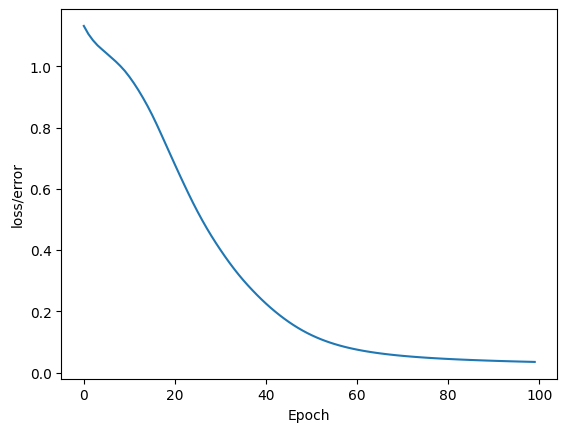

In [104]:
# Graph it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')